## Discrete-time competitive Beverton-Holt model

\begin{align}
N_{1,t+1}=\dfrac{r_1N_{1,t}}{1+a_{11}N_{1,t}+a_{12}N_{2,t}} \\
N_{2,t+1}=\dfrac{r_2N_{2,t}}{1+a_{22}N_{2,t}+a_{21}N_{1,t}}
\tag{1}
\end{align}

## Packages

In [1]:
import numpy as np # math expressions
import matplotlib.pyplot as plt # plot

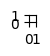

In [2]:
# Dummy plot
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.axhline(y=1, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})

## Initialization

In [3]:
# Variables for the per capita growth rate
tmax = 2
time = np.linspace(1,tmax,tmax)

y1 = np.zeros(tmax)
y1_ = np.zeros(tmax)
y2 = np.zeros(tmax)
y2_ = np.zeros(tmax)
per_capita1 = np.zeros(tmax)
per_capita1_ = np.zeros(tmax)
per_capita2 = np.zeros(tmax)
per_capita2_ = np.zeros(tmax)

y1[0] = 10 # initial conditions
y1_[0] = 2
y2[0] = 2
y2_[0] = 30

## Parameters

r1=20
r2=16
a11=2.7
a12=0.6
a21=0.6
a22=0.6

## cov > 0

r1=20
r2=12
a11=1
a12=1
a21=0.1
a22=1

## cov < 0

r1=20
r2=11
a11=1
a12=1
a21=0.1
a22=1

## cov = zero

r1=20
r2=11
a11=1
a12=1
a21=1
a22=1

In [4]:
r1=17
r2=19
a11=2.1
a12=0.3
a21=0.1
a22=0.9

r1=12
r2=19
a11=3.1
a12=0.9
a21=0.9
a22=0.8

In [5]:
## Discrete-time competitive Beverton-Holt model
i=0
stopRun=0
while stopRun==0: # stops the simulation when the dynamics converges
    per_capita1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
    per_capita1_[i] = r1 / ( 1 + a11 * y1_[i] + a12 * y2_[i] )
    per_capita2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
    per_capita2_[i] = r2 / ( 1 + a22 * y2_[i] + a21 * y1_[i] )
    y1[i+1] = y1[i] * per_capita1[i]
    y1_[i+1] = y1_[i] * per_capita1_[i]
    y2[i+1] = y2[i] * per_capita2[i]
    y2_[i+1] = y2_[i] * per_capita2_[i]
    per_capita1=np.append(per_capita1,per_capita1[i])
    per_capita1_=np.append(per_capita1_,per_capita1_[i])
    per_capita2=np.append(per_capita2,per_capita2[i])
    per_capita2_=np.append(per_capita2_,per_capita2_[i])
    y1=np.append(y1,y1[i])
    y1_=np.append(y1_,y1_[i])
    y2=np.append(y2,y2[i])
    y2_=np.append(y2_,y2_[i])
    if(np.abs(y1[i+1]-y1[i]) and np.abs(y2[i+1]-y2[i]) and np.abs(y1_[i+1]-y1_[i]) and np.abs(y2_[i+1]-y2_[i]) < 0.001):
        stopRun=1
    i+=1 # i=i+1

## Relative frequency

In [6]:
y_rel1 = np.zeros(len(y1))
y_rel1_ = np.zeros(len(y1))
y_rel2 = np.zeros(len(y1))
y_rel2_ = np.zeros(len(y1))
for i in range(len(y1)):
    y_rel1[i]=y1[i]/(y1[i]+y2[i])
    y_rel1_[i]=y1_[i]/(y1_[i]+y2_[i])
    y_rel2[i]=y2[i]/(y1[i]+y2[i])
    y_rel2_[i]=y2_[i]/(y1_[i]+y2_[i])

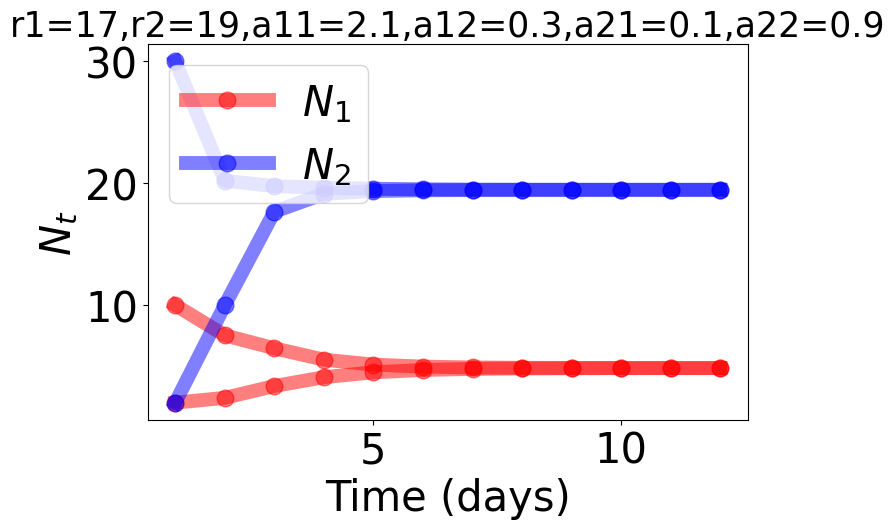

In [7]:
tmax = len(y1)
time = np.linspace(1,tmax,tmax)

fig, (ax) = plt.subplots(1,figsize=(8, 6))
ax.plot(time, y1, alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(time, y1_, alpha=0.5,marker="o", linewidth=10, markersize=12, color="r")
ax.plot(time, y2, alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.plot(time, y2_, alpha=0.5,marker="o", linewidth=10, markersize=12, color="b")
ax.set(xlabel='Time (days)', ylabel='$N_{t}$')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

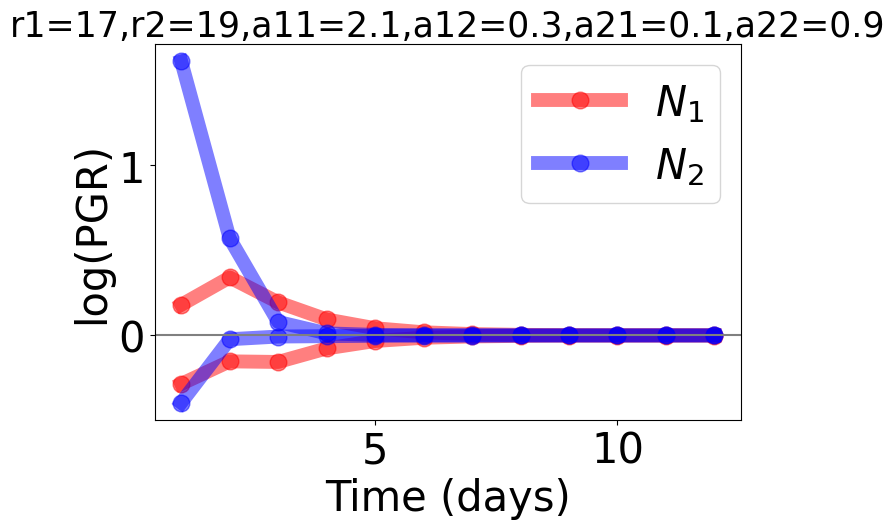

In [8]:
fig, (ax) = plt.subplots(1,figsize=(8, 6))
ax.plot(time, np.log(per_capita1), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(time, np.log(per_capita1_), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r")
ax.plot(time, np.log(per_capita2), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.plot(time, np.log(per_capita2_), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b")
ax.set(xlabel='Time (days)', ylabel='log(PGR)')
ax.axhline(y=0, color='grey', linestyle='-')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/pgr_time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

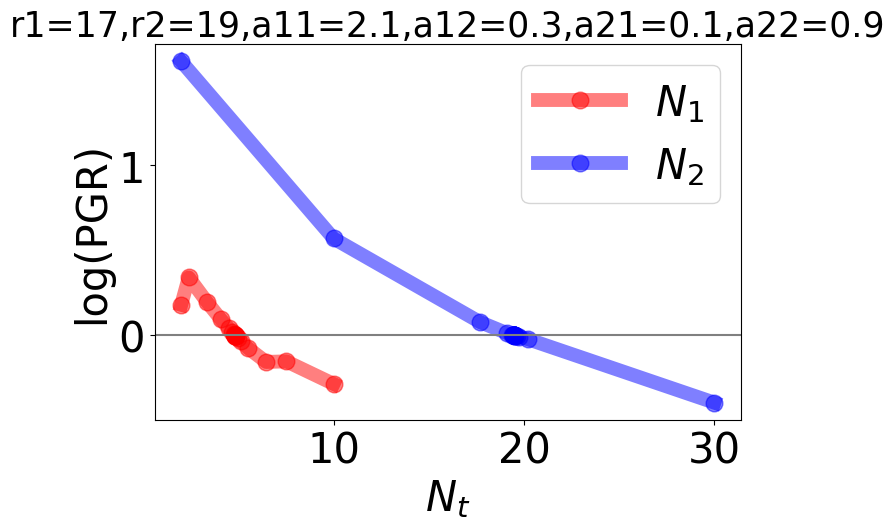

In [9]:
fig, (ax) = plt.subplots(1,figsize=(8, 6))
ax.plot(y1,np.log(per_capita1), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(y1_,np.log(per_capita1_), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r")
ax.plot(y2,np.log(per_capita2), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.plot(y2_,np.log(per_capita2_), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b")
ax.set(xlabel='$N_t$', ylabel='log(PGR)')
ax.axhline(y=0, color='grey', linestyle='-')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/yenni_N_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

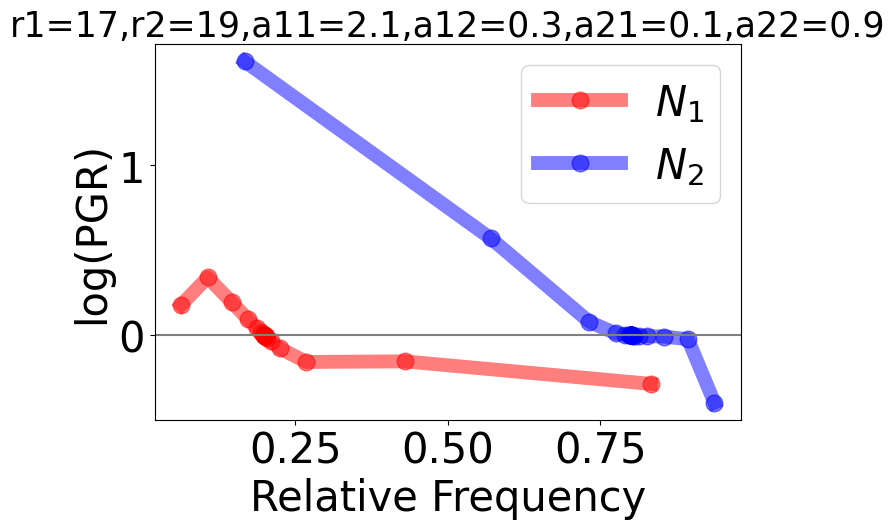

In [10]:
fig, (ax) = plt.subplots(1,figsize=(8, 6))
ax.plot(y_rel1,np.log(per_capita1), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(y_rel1_,np.log(per_capita1_), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r")
ax.plot(y_rel2,np.log(per_capita2), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.plot(y_rel2_,np.log(per_capita2_), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b")
ax.set(xlabel='Relative Frequency', ylabel='log(PGR)')
ax.axhline(y=0, color='grey', linestyle='-')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/yenni_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()